# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [ ]:
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# 1) seu código aqui
sinasc = pd.read_csv('SINASC_RO_2019.csv')
print(sinasc.shape)
sinasc.drop_duplicates().shape
sinasc.head()

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [11]:
sinasc.loc[(sinasc['APGAR5'] <= 3), 'APGAR_CATEGORIZADO'] = 'asfixia grave'
sinasc.loc[(sinasc['APGAR5']>3) & (sinasc['APGAR5']<=5), 'APGAR_CATEGORIZADO'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5']>5) & (sinasc['APGAR5']<=7), 'APGAR_CATEGORIZADO'] = 'asfixia leve'
sinasc.loc[(sinasc['APGAR5']>7) & (sinasc['APGAR5']<=10), 'APGAR_CATEGORIZADO'] = 'normal'
#sinasc

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [15]:
listagestacao = [['Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas'],
                 ['32 a 36 semanas', '37 a 41 semanas', '42 semanas e mais']]


<AxesSubplot:xlabel='APGAR5'>

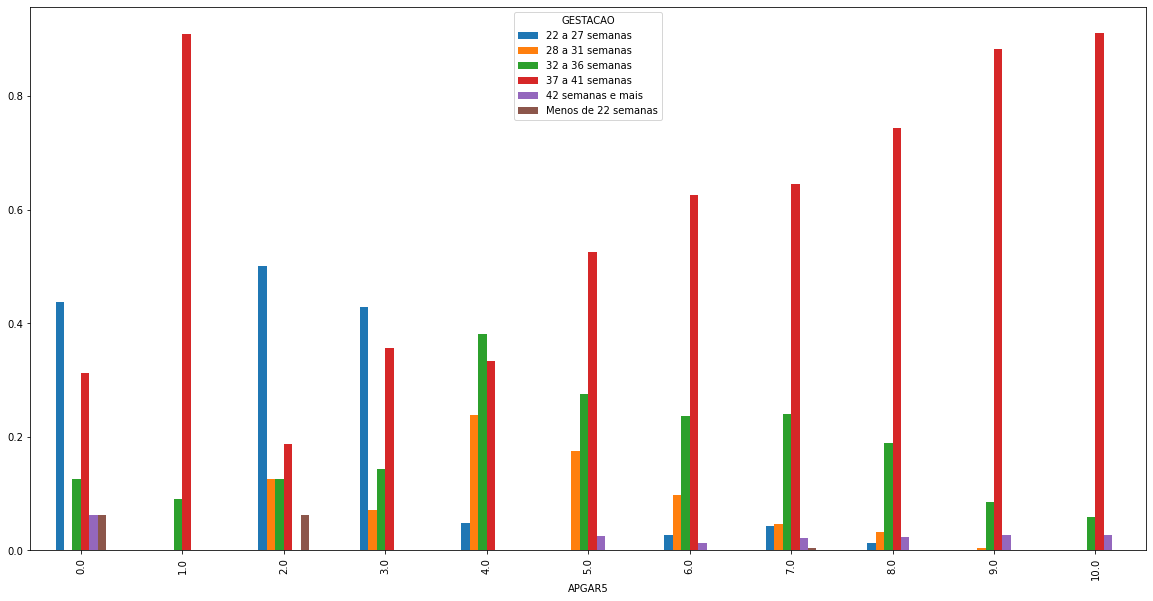

In [21]:
freq = pd.crosstab(sinasc['APGAR5'], sinasc['GESTACAO'])
freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
freq_pctlin.plot.bar()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

<AxesSubplot:xlabel='GESTACAO'>

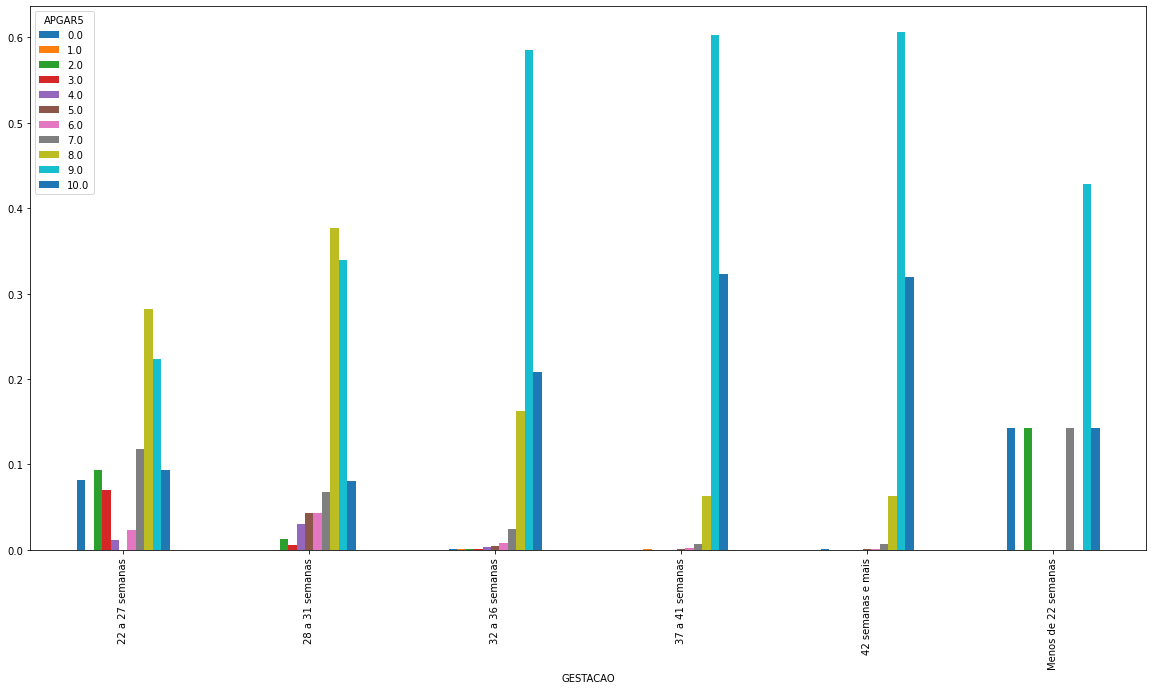

In [22]:
freq = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'])
freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
freq_pctlin.plot.bar()

####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [25]:
freq = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'])
print(freq)

APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     2     2     8    11    17    56   362   
37 a 41 semanas         5    20     3     5     7    21    45   151  1417   
42 semanas e mais       1     0     0     0     0     1     1     5    44   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5                9.0   10.0  
GESTACAO                          
22 a 27 semanas         19     8  
28 a 31 semanas         55    13  
32 a 36 semanas       1307   465  
37 a 41 semanas      13565  7284  
42 semanas e mais      423   223  
Menos de 22 semanas      3     1  


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='GESTACAO'>

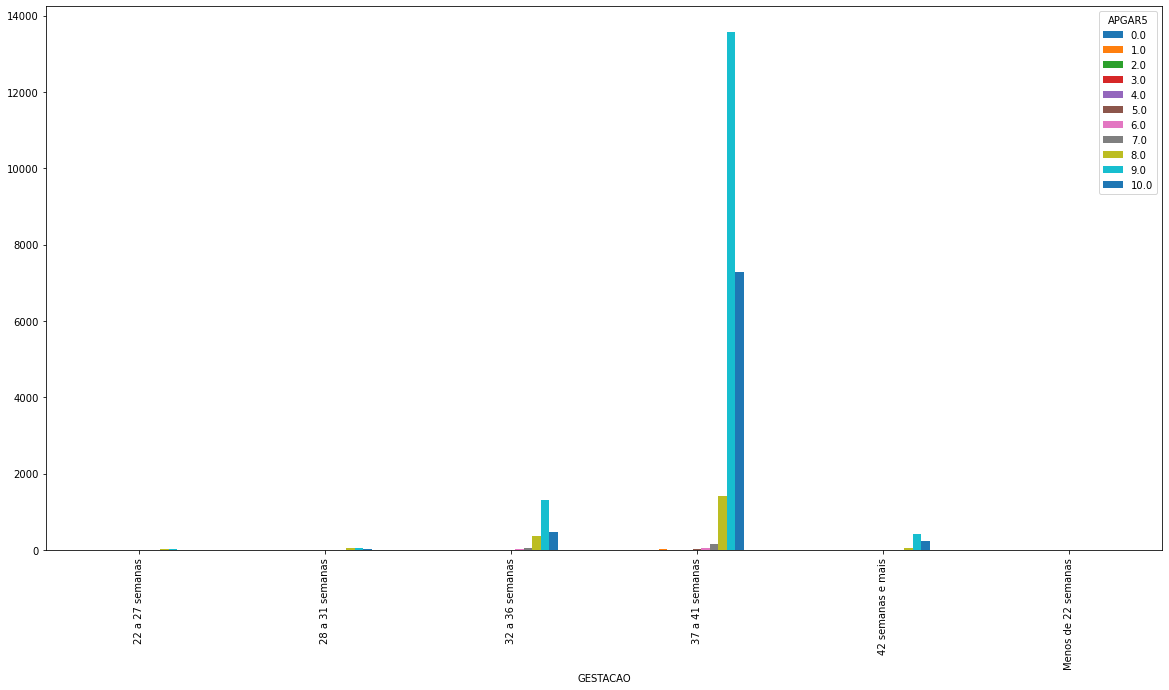

In [26]:
freq.plot.bar()

<AxesSubplot:xlabel='GESTACAO'>

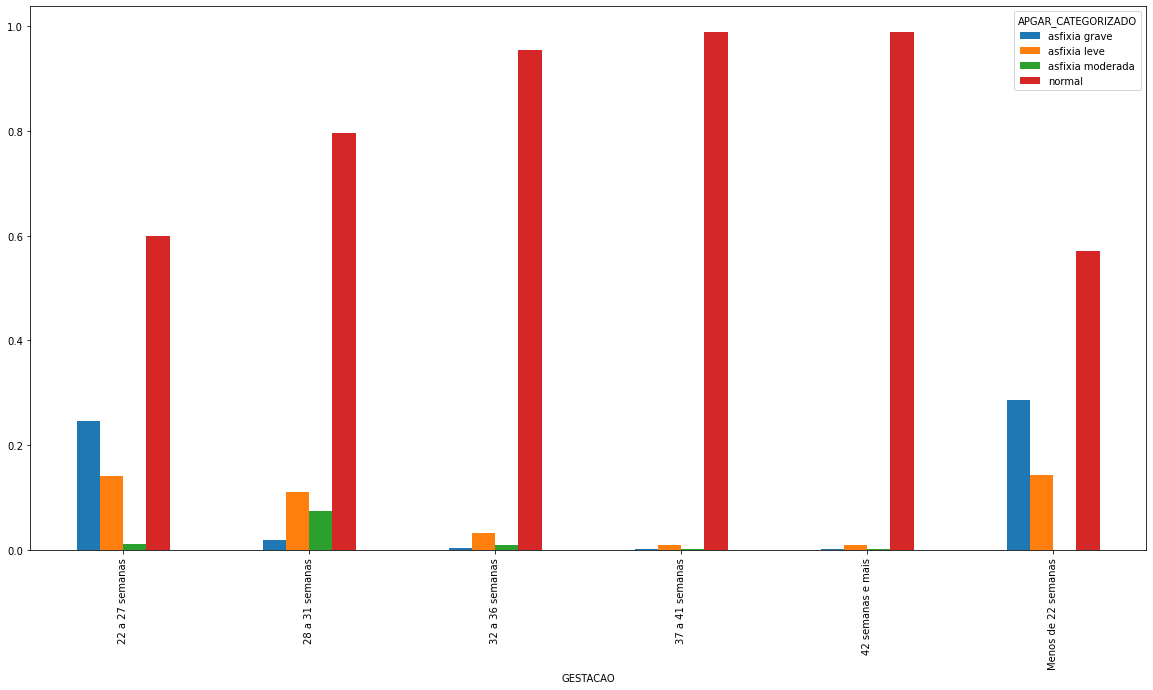

In [27]:
freq2 = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR_CATEGORIZADO'])
freq_pctlin2 = freq2.div(freq2.sum(axis = 1), axis = 0)
freq_pctlin2.plot.bar()

In [ ]:
Eu acho que tenha relação pelo gráfico de gestação vs categorizado do apgar5 demonstrar haver significativamente menos 
asfixias quando superior  ou próximo a 37 semanas.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [ ]:
sns.boxplot(data = sinasc,
            x = 'PESO',
            y = 'APGAR_CATEGORIZADO',
            order = ['normal', 'asfixia leve', 'asfixia moderada', 'asfixia grave'],
            orient = 'h',
            palette = 'colorblind'
            )

In [ ]:
Nas gestações antes de 31 semanas quando o bebê tem peso inferior a 3 kg parece haver correspondência com a asfixia.